In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

<h3>Load Data</h3>

In [13]:
test_results = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/AB_TESTING Pricing Test/test_results.csv")
user_table = pd.read_csv("../Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/AB_TESTING Pricing Test/user_table.csv")

In [14]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [15]:
user_table.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [16]:
test_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           316800 non-null  int64 
 1   timestamp         316800 non-null  object
 2   source            316800 non-null  object
 3   device            316800 non-null  object
 4   operative_system  316800 non-null  object
 5   test              316800 non-null  int64 
 6   price             316800 non-null  int64 
 7   converted         316800 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 19.3+ MB


In [17]:
user_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275616 entries, 0 to 275615
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  275616 non-null  int64  
 1   city     275616 non-null  object 
 2   country  275616 non-null  object 
 3   lat      275616 non-null  float64
 4   long     275616 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [18]:
column = ["source", "device", "operative_system", "price"]
for i in column:
    print("{0:20s} {1:10d}\t".format(i, len(test_results[i].unique())), test_results[i].unique()[:5])

source                       12	 ['ads_facebook' 'seo-google' 'ads-bing' 'direct_traffic' 'ads-google']
device                        2	 ['mobile' 'web']
operative_system              6	 ['iOS' 'android' 'mac' 'windows' 'other']
price                         2	 [39 59]


In [19]:
column = ["city", "country"]
for i in column:
    print("{0:20s} {1:10d}\t".format(i, len(user_table[i].unique())), user_table[i].unique()[:5])

city                        923	 ['Peabody' 'Reno' 'Rialto' 'Carson City' 'Chicago']
country                       1	 ['USA']


In [20]:
df = test_results.merge(user_table, how = "left", on = "user_id")
df.drop(["country", "lat", "long"], inplace = True, axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316800 entries, 0 to 316799
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           316800 non-null  int64 
 1   timestamp         316800 non-null  object
 2   source            316800 non-null  object
 3   device            316800 non-null  object
 4   operative_system  316800 non-null  object
 5   test              316800 non-null  int64 
 6   price             316800 non-null  int64 
 7   converted         316800 non-null  int64 
 8   city              275616 non-null  object
dtypes: int64(4), object(5)
memory usage: 24.2+ MB


In [29]:
# wrong datetime (minutes == 60)
df[df["timestamp"].str.slice(start = -5, stop = -3) == "60"]

,user_id,timestamp,source,device,operative_system,test,price,converted,city
54,370914,2015-04-24 12:60:46,direct_traffic,mobile,android,0,39,0,North Charleston
104,549807,2015-04-24 11:60:20,friend_referral,mobile,iOS,0,39,0,San Antonio
121,107010,2015-03-14 12:60:02,direct_traffic,web,windows,0,39,0,Dallas
282,676183,2015-05-11 12:60:53,ads-google,web,windows,1,59,0,Las Vegas
287,641153,2015-04-26 11:60:44,direct_traffic,mobile,android,0,39,0,Raleigh
...,...,...,...,...,...,...,...,...,...
316138,212261,2015-04-13 18:60:11,ads_other,mobile,iOS,0,39,0,Peoria
316517,15556,2015-04-25 14:60:58,ads_other,mobile,android,0,39,0,Livonia
316525,121009,2015-05-11 12:60:53,ads-google,web,windows,1,59,0,Las Vegas
316558,136560,2015-04-10 11:60:29,ads_other,web,windows,1,59,0,Laredo


In [31]:
df.fillna("NA", inplace= True)

In [33]:
df.groupby(["test", "price"]).count()

user_id  timestamp  source  device  operative_system  converted  \
test price                                                                    
0    39      202517     202517  202517  202517            202517     202517   
     59         210        210     210     210               210        210   
1    39         155        155     155     155               155        155   
     59      113918     113918  113918  113918            113918     113918   

              city  
test price          
0    39     202517  
     59        210  
1    39        155  
     59     113918

In [48]:
df.loc[(df["test"] == 1) & (df["price"] == 39), "test"] = 0
df.loc[(df["test"] == 0) & (df["price"] == 59), "test"] = 1

In [49]:
df.groupby(["test", "price"]).count()

,,user_id,timestamp,source,device,operative_system,converted,city
test,price,,,,,,,
0,39,202672,202672,202672,202672,202672,202672,202672
1,59,114128,114128,114128,114128,114128,114128,114128


<h3>Visualization</h3>

check whether or not the test are totally randomized

In [50]:
df.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers


In [73]:
source = df.groupby("test")["source"].value_counts(normalize = True).to_frame()

In [78]:
source.columns = ["dist"]
source = source.reset_index()

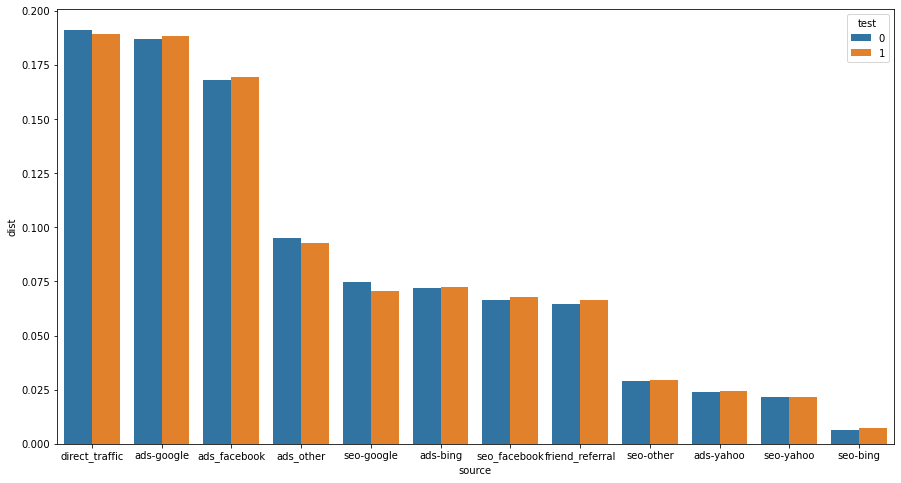

In [82]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "source", y = "dist", data = source, hue = "test")
plt.show()

In [83]:
device = df.groupby("test")["device"].value_counts(normalize = True).to_frame()

In [85]:
device.columns = ["dist"]
device = device.reset_index()

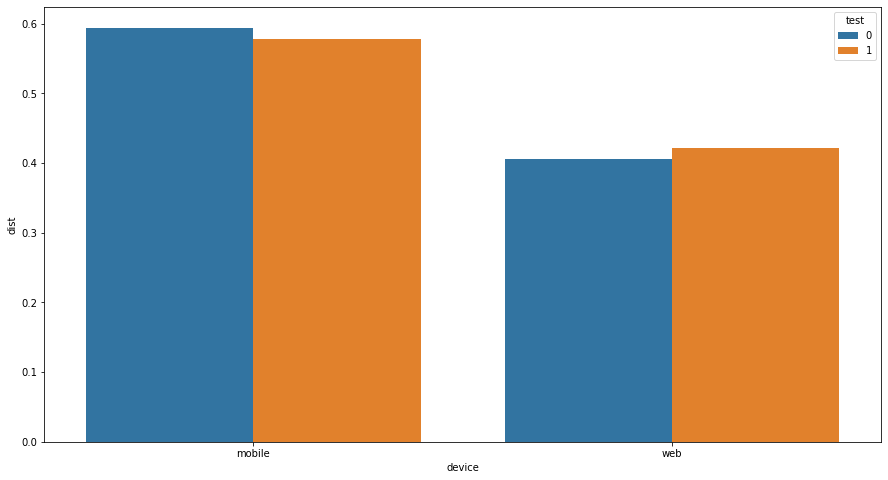

In [86]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "device", y = "dist", data = device, hue = "test")
plt.show()

In [89]:
os = df.groupby("test")["operative_system"].value_counts(normalize = True).to_frame().rename(columns = {"operative_system":"dist"}).reset_index()

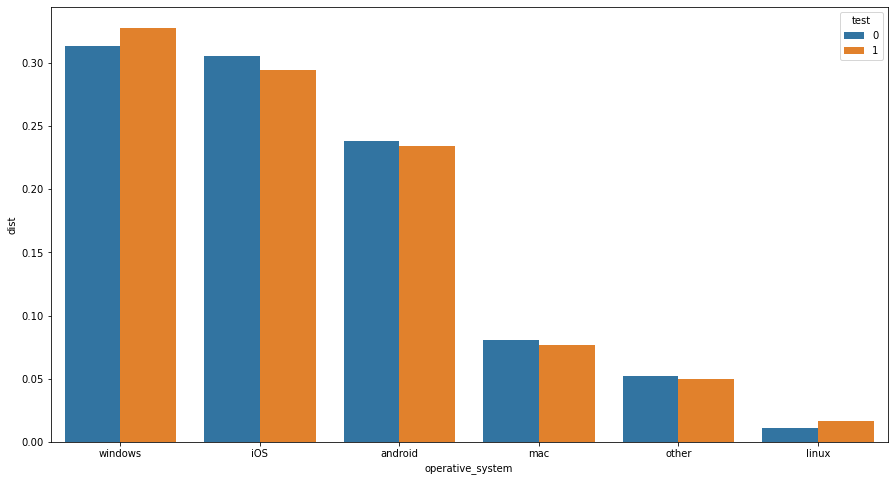

In [92]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "operative_system", y = "dist", data = os, hue = "test")
plt.show()

<h3>Question 1</h3>

In [96]:
df["revenue"] = df["price"] * df["converted"]

In [97]:
df[["test", "converted"]].groupby("test").mean()

,converted
test,
0,0.019889
1,0.015570


In [98]:
df[["test", "revenue"]].groupby("test").mean()

,revenue
test,
0,0.775682
1,0.918644


In [108]:
control = df[df["test"] == 0]["revenue"].values
test = df[df["test"] == 1]["revenue"].values

print(ttest_ind(test, control, equal_var= False))

Ttest_indResult(statistic=5.770369440939589, pvalue=7.922257729461028e-09)


<h3>Question 2</h3>

In [109]:
df.groupby("source")["converted"].mean().reset_index()

,source,converted
0,ads-bing,0.011979
1,ads-google,0.021489
2,ads-yahoo,0.014770
3,ads_facebook,0.021200
4,ads_other,0.014359
5,direct_traffic,0.012310
6,friend_referral,0.038705
7,seo-bing,0.023688
8,seo-google,0.017001
9,seo-other,0.015659


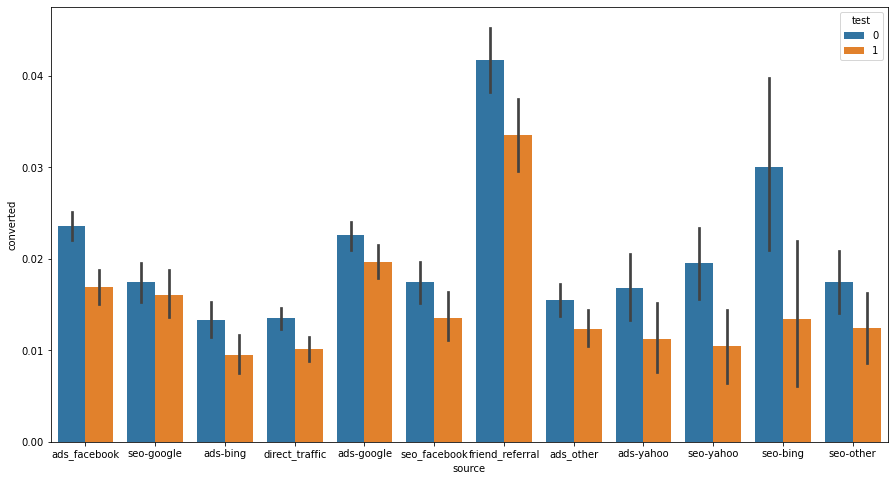

In [111]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "source", y = "converted", hue = "test", data = df)
plt.show()

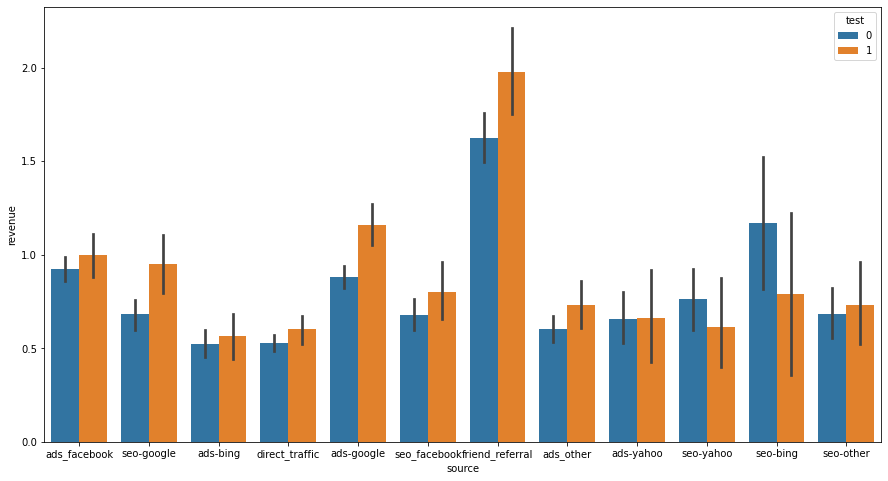

In [112]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "source", y = "revenue",hue = "test", data = df)
plt.show()

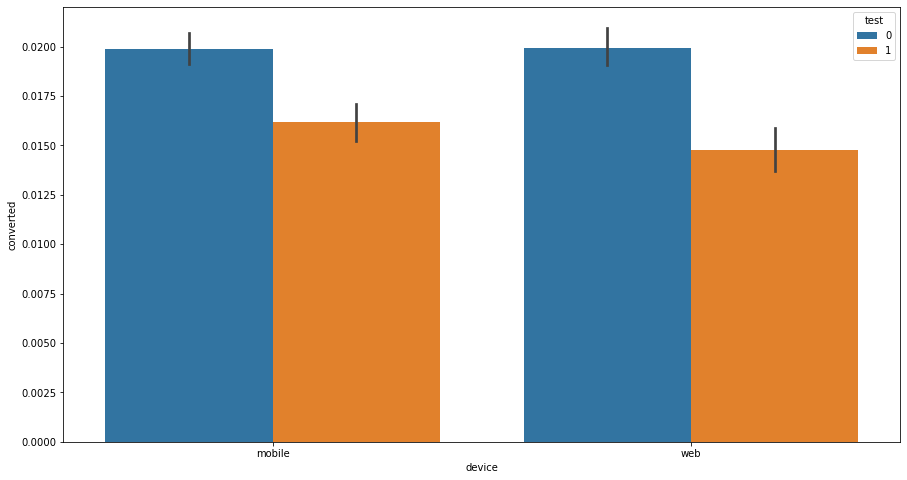

In [113]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "device", y = "converted",hue = "test", data = df)
plt.show()

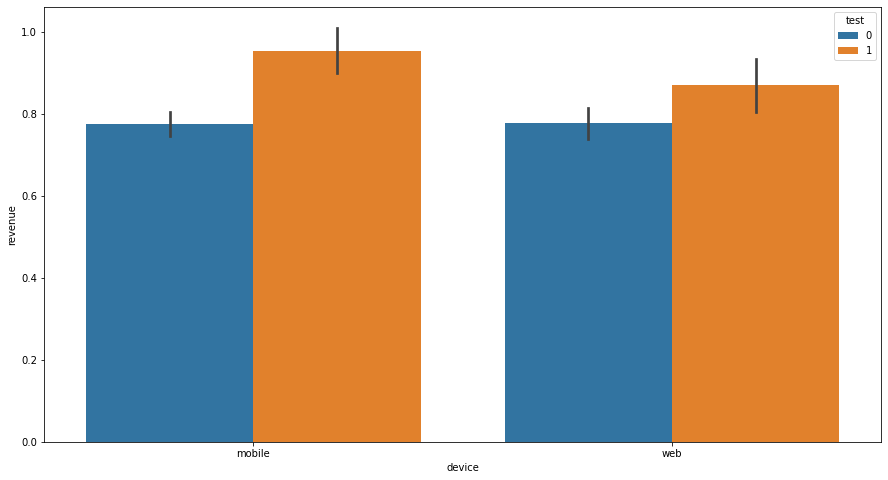

In [114]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "device", y = "revenue",hue = "test", data = df)
plt.show()

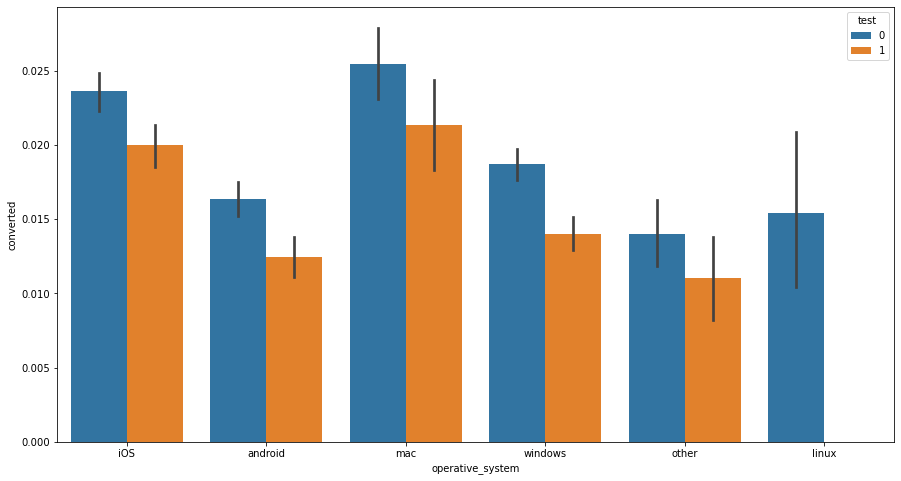

In [115]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "operative_system", y = "converted",hue = "test", data = df)
plt.show()

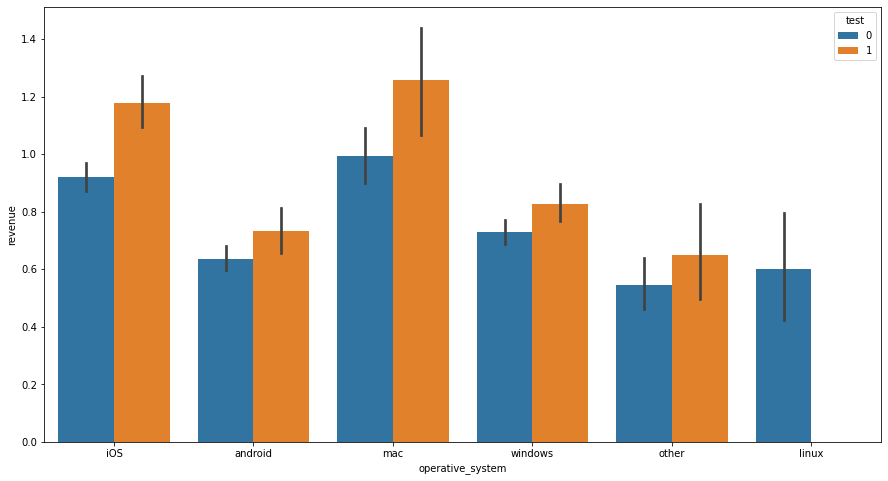

In [116]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.barplot(x = "operative_system", y = "revenue",hue = "test", data = df)
plt.show()